In [3]:
import numpy as numpy
import pandas as pd

In [7]:
#load data and see the first few items
song_data = pd.read_csv("spotify_song.csv")
print(song_data.head())

   Unnamed: 0                track_id  \
0           0  6f807x0ima9a1j3VPbc7VN   
1           1  0r7CVbZTWZgbTCYdfa2P31   
2           2  1z1Hg7Vb0AhHDiEmnDE79l   
3           3  75FpbthrwQmzHlBJLuGdC7   
4           4  1e8PAfcKUYoKkxPhrHqw4x   

                                          track_name      track_artist  \
0  I Don't Care (with Justin Bieber) - Loud Luxur...        Ed Sheeran   
1                    Memories - Dillon Francis Remix          Maroon 5   
2                    All the Time - Don Diablo Remix      Zara Larsson   
3                  Call You Mine - Keanu Silva Remix  The Chainsmokers   
4            Someone You Loved - Future Humans Remix     Lewis Capaldi   

   track_popularity          track_album_id  \
0                66  2oCs0DGTsRO98Gh5ZSl2Cx   
1                67  63rPSO264uRjW1X5E6cWv6   
2                70  1HoSmj2eLcsrR0vE9gThr4   
3                60  1nqYsOef1yKKuGOVchbsk6   
4                69  7m7vv9wlQ4i0LFuJiE2zsQ   

                         

In [8]:
#Show the shape of the data to know how many rows and columns exists
song_data.shape

(32833, 24)

In [9]:
#Check for missing values
song_data.isnull().sum()

Unnamed: 0                  0
track_id                    0
track_name                  5
track_artist                5
track_popularity            0
track_album_id              0
track_album_name            5
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64

In [10]:
#Drop the missing values
clean_song_data = song_data.dropna()

#check for missing values again
clean_song_data.isnull().sum()

Unnamed: 0                  0
track_id                    0
track_name                  0
track_artist                0
track_popularity            0
track_album_id              0
track_album_name            0
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64

In [12]:
#Check for any duplicated items
clean_song_data.duplicated()

#drop any duplicates
clean_song_data.drop_duplicates(inplace=True)

C:\Users\maria\AppData\Local\Temp\ipykernel_7048\1269268935.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_song_data.drop_duplicates(inplace=True)


In [14]:
#print the names of the columns
print(clean_song_data.columns)

Index(['Unnamed: 0', 'track_id', 'track_name', 'track_artist',
       'track_popularity', 'track_album_id', 'track_album_name',
       'track_album_release_date', 'playlist_name', 'playlist_id',
       'playlist_genre', 'playlist_subgenre', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'duration_ms'],
      dtype='object')


In [15]:
#drop any columns that we dim irrelevant for the recommendation system
cleaned_song_data = clean_song_data.drop(['Unnamed: 0', 'track_album_id', 
                                          'track_album_release_date', 'key', 'mode'], axis=1)

In [16]:
#print the new shape of the cleaned data and the columns 
print(cleaned_song_data.columns)
cleaned_song_data.shape

Index(['track_id', 'track_name', 'track_artist', 'track_popularity',
       'track_album_name', 'playlist_name', 'playlist_id', 'playlist_genre',
       'playlist_subgenre', 'danceability', 'energy', 'loudness',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms'],
      dtype='object')


(32828, 19)

In [24]:
#Created a heatmap to see the correlation between the different features of the data
features = cleaned_song_data[['danceability', 'energy','loudness', 'speechiness', 
                              'acousticness', 'instrumentalness', 'liveness', 'tempo', 'duration_ms']]

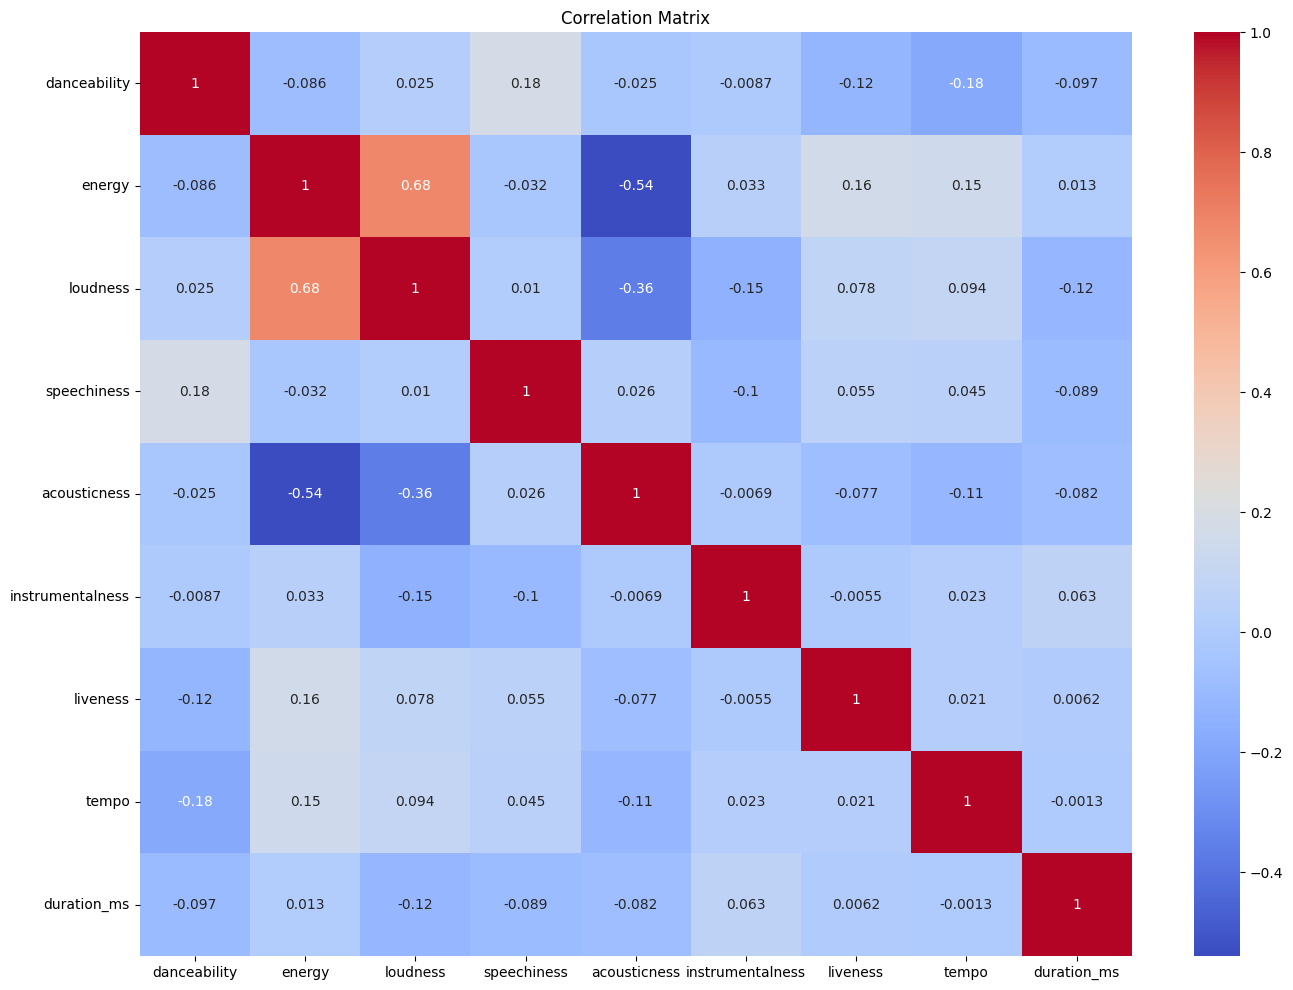

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = features.corr()

plt.figure(figsize=(16,12))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

